In [1]:
!pip install tensorflow==2.0
#importing dependecies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math


     |████████████████████████████████| 86.3 MB 35 kB/s 
     |████████████████████████████████| 50 kB 5.1 MB/s 
     |████████████████████████████████| 449 kB 50.8 MB/s 
     |████████████████████████████████| 3.8 MB 28.6 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=d4cae6178f94f060093a4a68c3eda40d5f342b2f251dcee2e6734b9f122e21d7
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Success

In [2]:
#generating many sample datapoints
SAMPLES = 1000


In [3]:
#Setting a seed value, so we get the same random numbers each time we run this
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)


In [4]:
#Generate a uniformly distributed between 0 to 2pi
#This covers the sine wave
x_values = np.random.uniform(low=0,high=2*math.pi, size=SAMPLES)


In [5]:
#shuffling the values to guarantee they are not in order.
#for deeplearning this step is important to assure the data being fed
#to the model is random
np.random.shuffle(x_values)

In [6]:
#calculating the corresponding sine values
y_values = np.sin(x_values)

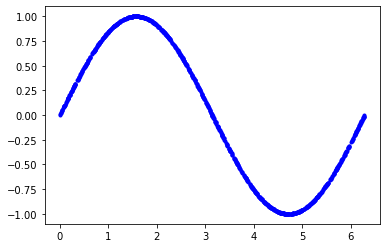

In [7]:
#Plot our data. The 'b.' argument tells the library to print the blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()


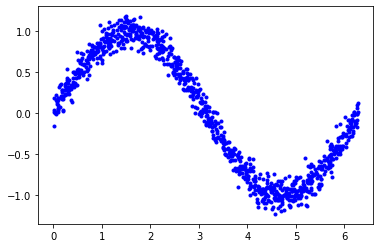

In [8]:
#testing deeplearning, by adding random numbers to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

#plotting the data
plt.plot(x_values, y_values, 'b.')
plt.show()


In [9]:
#60% of the data is for training
#20% of the data is for testing
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

In [10]:
#dividing the data into three chuncks with np.split
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train,y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

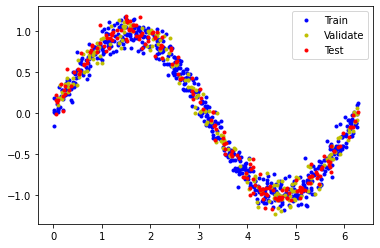

In [11]:
#double checking that the split adds up
assert(x_train.size + x_validate.size + x_test.size) == SAMPLES

#plot the data in each of the partitions using different colors
plt.plot(x_train, y_train, 'b.', label = "Train")
plt.plot(x_validate, y_validate, 'y.', label = "Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()



In [12]:
#using Keras to create a simple model architecture
from tensorflow.python import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense
model_1 = keras.Sequential()


#first layer takes a scalar input and feeds it through 16 "neurons." 
#the neurones decide whether to activate based on the 'relu' activation function
model_1.add(layers.Dense(16, activation = 'relu', input_shape =(1,)))

In [13]:
#the final layer is a single neuron, since we want to output a single value
model_1.add(layers.Dense(1))


In [14]:
#compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])


In [15]:
#printing the summary of the model's architecture
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [16]:
#training
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16, validation_data = (x_validate, y_validate))

Train on 600 samples, validate on 200 samples
Epoch 1/1000
600/600 [==============================] - 1s 2ms/sample - loss: 0.7887 - mae: 0.7848 - val_loss: 0.5824 - val_mae: 0.6867
Epoch 2/1000
600/600 [==============================] - 0s 151us/sample - loss: 0.4883 - mae: 0.6194 - val_loss: 0.4742 - val_mae: 0.6056
Epoch 3/1000
600/600 [==============================] - 0s 142us/sample - loss: 0.4208 - mae: 0.5637 - val_loss: 0.4259 - val_mae: 0.5631
Epoch 4/1000
600/600 [==============================] - 0s 227us/sample - loss: 0.3822 - mae: 0.5367 - val_loss: 0.3861 - val_mae: 0.5356
Epoch 5/1000
600/600 [==============================] - 0s 226us/sample - loss: 0.3472 - mae: 0.5115 - val_loss: 0.3512 - val_mae: 0.5097
Epoch 6/1000
600/600 [==============================] - 0s 285us/sample - loss: 0.3173 - mae: 0.4885 - val_loss: 0.3196 - val_mae: 0.4852
Epoch 7/1000
600/600 [==============================] - 0s 129us/sample - loss: 0.2891 - mae: 0.4684 - val_loss: 0.2935 - val_ma

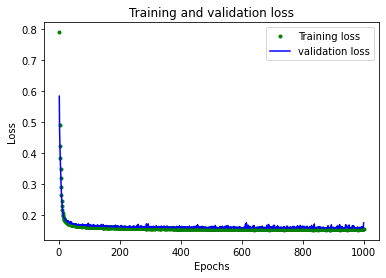

In [17]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss)+ 1 )

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

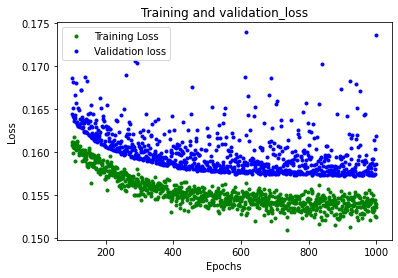

In [18]:
#Adjusting the Graph to better readability
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label = 'Training Loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label = 'Validation loss')
plt.title('Training and validation_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


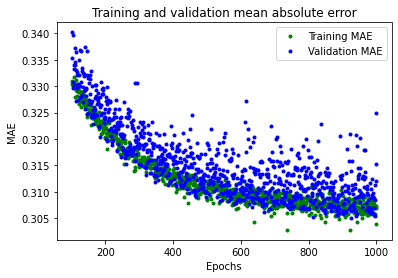

In [19]:
#mean absolute error Graph - ammount of error

mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label = 'Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label = 'Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

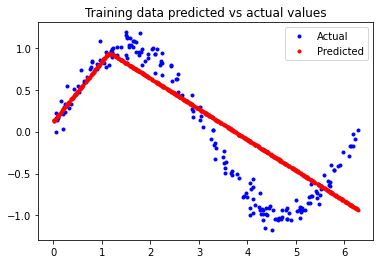

In [20]:
predictions = model_1.predict(x_train)

plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label = 'Actual')
plt.plot(x_train, predictions, 'r.', label = 'Predicted')
plt.legend()
plt.show()


In [21]:
#adding more neurones
model_2 = tf.keras.Sequential()

model_2.add(layers.Dense(16,  activation = 'relu', input_shape = (1,)))

model_2.add(layers.Dense(16, activation ='relu'))

model_2.add(layers.Dense(1))

#compiling
model_2.compile(optimizer = 'rmsprop', loss='mse', metrics=['mae'])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [22]:
history_2 = model_2.fit(x_train, y_train, epochs = 600, batch_size = 16, validation_data = (x_validate, y_validate))

Train on 600 samples, validate on 200 samples
Epoch 1/600
600/600 [==============================] - 1s 1ms/sample - loss: 0.6993 - mae: 0.7257 - val_loss: 0.4758 - val_mae: 0.6040
Epoch 2/600
600/600 [==============================] - 0s 163us/sample - loss: 0.4000 - mae: 0.5489 - val_loss: 0.3766 - val_mae: 0.5306
Epoch 3/600
600/600 [==============================] - 0s 180us/sample - loss: 0.3225 - mae: 0.4913 - val_loss: 0.3078 - val_mae: 0.4715
Epoch 4/600
600/600 [==============================] - 0s 156us/sample - loss: 0.2664 - mae: 0.4482 - val_loss: 0.2561 - val_mae: 0.4314
Epoch 5/600
600/600 [==============================] - 0s 166us/sample - loss: 0.2206 - mae: 0.4084 - val_loss: 0.2094 - val_mae: 0.3941
Epoch 6/600
600/600 [==============================] - 0s 146us/sample - loss: 0.1883 - mae: 0.3798 - val_loss: 0.1816 - val_mae: 0.3689
Epoch 7/600
600/600 [==============================] - 0s 157us/sample - loss: 0.1666 - mae: 0.3571 - val_loss: 0.1709 - val_mae: 0.35

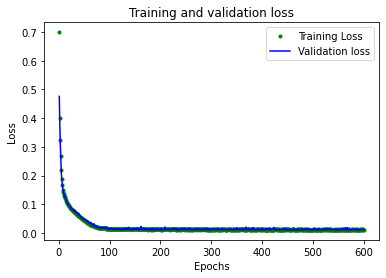

In [23]:
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label = 'Training Loss')

plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

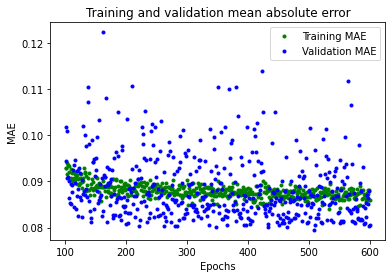

In [24]:
plt.clf()

#mean absolute error
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label ='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label = 'Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


200/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

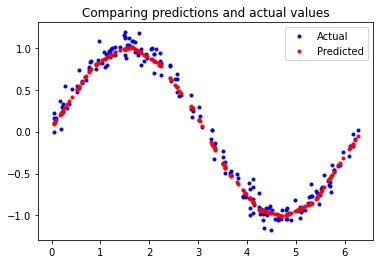

In [26]:
#plotting the adjusted training model
loss = model_2.evaluate(x_test, y_test)

predictions = model_2.predict(x_test)

plt.clf()
plt.title('Comparing predictions and actual values')
plt.plot(x_test, y_test, 'b.', label = 'Actual')
plt.plot(x_test, predictions, 'r.', label = 'Predicted')
plt.legend()

It seems the neural network is now overfitting. But in this case it is not a deal breaker


We will quantize the neural network and reduce its size to fit it at the edge (microcontroler)


In [28]:
#converting into TensorFlow Lite, no quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

open("sine_model.tflite", "wb").write(tflite_model)

2736

In [29]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)

#optimizing
converter.optimizations = [tf.lite.Optimize.DEFAULT]

def respresentative_dataset_generator():
  for value in x_test:
    yield [np.array(value, dtype = np.float32, ndmin = 2)]

converter.representative_dataset = respresentative_dataset_generator
tflite_model = converter.convert()

open("sine_model_quantized.tflite", "wb").write(tflite_model)





2512

OOH! Original model was reduced in size! yes! 

Naa maa dere AB testen!

In [44]:
#instatiating and interpreter for each tflite and tf model

sine_model = tf.lite.Interpreter('sine_model_quantized.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

#memory allocation
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

#indexes
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]["index"]

sine_model_predictions = []
sine_model_quantized_predictions = []


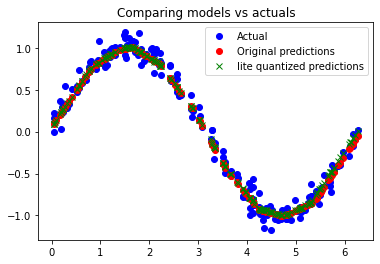

In [45]:
#running  each model's interpretrer and storing values in the arrays
for x_value in x_test:
  x_value_tensor = tf.convert_to_tensor([[x_value]], dtype = np.float32)

  sine_model.set_tensor(sine_model_input_index, x_value_tensor)

  sine_model.invoke()
  sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])
  
  sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
  sine_model_quantized.invoke()
  sine_model_quantized_predictions.append(sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])

plt.clf()
plt.title('Comparing models vs actuals')
plt.plot(x_test, y_test, 'bo', label = 'Actual')
plt.plot(x_test, predictions, 'ro', label = 'Original predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', label = 'lite quantized predictions')
plt.legend()
plt.show()

In [46]:
#comparing quantized model
import os
basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes" % basic_model_size)

quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes" % quantized_model_size)

difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)


Basic model is 2736 bytes
Quantized model is 2512 bytes
Difference is 224 bytes


In [48]:
#using xxd to transfor and save in c
!apt-get -qq install xxd
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc
!cat sine_model_quantized.cc


Selecting previously unselected package xxd.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.8_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.8) ...
Setting up xxd (2:8.0.1453-1ubuntu1.8) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
unsigned char sine_model_quantized_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x12, 0x00,
  0x1c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x10, 0x00, 0x14, 0x00,
  0x00, 0x00, 0x18, 0x00, 0x12, 0x00, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x60, 0x09, 0x00, 0x00, 0xa8, 0x02, 0x00, 0x00, 0x90, 0x02, 0x00, 0x00,
  0x3c, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x0c, 0x00, 0x04, 0x00, 0x08, 0x00,
  0x08, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00, 0x0b, 0x00, 0x00, 0x00,
  0x13, 0x00, 0x00, 0x00, 0x6d, 0x69, 0x6e, 0x5f, 0x72, 0x75, 0x6e, 0x74,
  0x69, 0x6d, 0x65, 0x5f, 0x76, 0x65,

In [50]:
#include "tensorflow/lite/micro/examples/hello_world/sine_model_data.h"
#include "tensorflow/lite/micro/kernels/all_ops_resolver.h"
#include "tensorflow/lite/micro/micro_error_reporter.h"
#include "tensorflow/lite/micro/micro_interpreter.h"
#include "tensorflow/lite/micro/testing/micro_test.h"
#include "tensorflow/lite/schema/schema_generated.h"
#include "tensorflow/lite/version.h"
